In [35]:
import os
import sys
import importlib
import pickle
import emcee
import corner
AbsPath = str(os.path.abspath(""))+"/.."
sys.path.append(AbsPath)
#from Scripts.Plots import SDSS_Plots
import scipy.stats
from itertools import cycle
#Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1)
import matplotlib.pyplot as plt
from Functions import Functions as F
HMF_fun = F.Make_HMF_Interp()
from Functions.Functions import Make_HMF_Interp
import numpy as np
import matplotlib.pyplot as plt
import colossus.halo.mass_adv as massdefs
from colossus.halo.mass_so import M_to_R
from halotools import empirical_models
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
from astropy.cosmology import Planck15 as Cosmo_AstroPy
Cosmo =cosmology.getCurrent()


h = Cosmo.h

#Abundance Matching Parameters
Override =\
{\
'M10':12.0,\
'SHMnorm10':0.032,\
'beta10':1.5,\
'gamma10':0.56,\
'M11':0.6,\
'SHMnorm11':-0.014,\
'beta11':-2,\
'gamma11':0.08\
}


AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'Illustris': False,\
'z_Evo':True,\
'Scatter': 0.15,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False,\
'g_PFT4': False\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE',\
'PreProcessing': False,\
'AltDynamicalTimeB': False\
}



#Subhalomass function parameters macc/M0
Unevolved = {\
'gamma' : 0.22,\
'alpha' : -0.91,\
'beta' : 6,\
'omega' : 3,\
'a' : 1,\
}

In [36]:
importlib.reload(F)

<module 'Functions.Functions' from '/data/pg1g15/STEEL/Notebooks/../Functions/Functions.py'>

11.45 0.4968


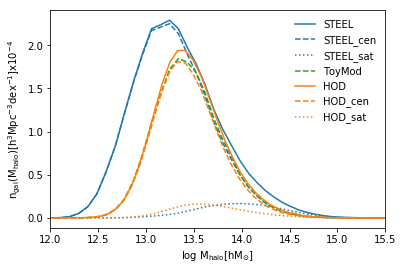

In [104]:
#Load Tinker_HOD
Tkr_hod = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_hod.dat", skiprows=2).T
Tkr_RX2 = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_RX2.dat", skiprows=2).T
#Load STEEL
Fit = ('1.0', True, True, True, 'G19_DPL', 'G19_SE')#('1.0', False, False, True, 'G19_DPL', 'G19_SE')
AvaHaloMass, z, AnalyticalModelFrac_highz, AnalyticalModelNoFrac_highz, SM_Cuts = F.LoadData_Sat_Env_Highz(Fit)
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)



#Plot Full STEEL
Data_M_ix = np.digitize(11.45, bins = SM_Cuts)-1
Data_z_ix = np.digitize(0.5, bins = z)-1
print(SM_Cuts[Data_M_ix],z[Data_z_ix])
Y_Model = np.divide(AnalyticalModelNoFrac_highz[Data_M_ix][Data_z_ix], AvaHaloMassBins[Data_z_ix])
X_sat, Y_sat = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Y_Model, Scatt = 0.1)
Y_sat = Y_sat*(10**4)*(h**-3)

AbnMtch[Fit[5]] = True
Central_Wt = HMF_fun(AvaHaloMass[Data_z_ix], 0.5)
SM = F.DarkMatterToStellarMass(AvaHaloMass[Data_z_ix]-np.log10(h), 0.5, Paramaters, ScatterOn=False)
Norm = scipy.stats.norm(SM, 0.15)
Prob = 1-Norm.cdf(11.45)
Central_Wt = Central_Wt*Prob
X_cen, Y_cen = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Central_Wt, Scatt = 0.1)
Y_cen = Y_cen*(10**4)
AbnMtch[Fit[5]] = False

#X_sat==X_cen
plt.plot(X_sat, Y_cen+Y_sat, "-",label ="STEEL", color = "C0")
plt.plot(X_cen, Y_cen, "--",label ="STEEL_cen", color = "C0")
plt.plot(X_sat, Y_sat, ":",label = "STEEL_sat", color = "C0")



#Central only toy model
Override['M10'] = 12.0
Override['SHMnorm10'] = 0.032
Override['beta10'] = 1.5
Override['gamma10'] = 0.58
Override['M11'] = 0.6
Override['SHMnorm11'] = -0.014
Override['beta11'] = -0.7
Override['gamma11'] = 0.08

AbnMtch['Override_z'] = True
Central_Wt = HMF_fun(AvaHaloMass[Data_z_ix], 0.5)
SM = F.DarkMatterToStellarMass(AvaHaloMass[Data_z_ix]-np.log10(h), 0.5, Paramaters, ScatterOn = False)
Norm = scipy.stats.norm(SM, 0.1)
Prob = 1-Norm.cdf(11.45)
Central_Wt = Central_Wt*Prob
X_cen, Y_cen = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Central_Wt, Scatt = 0.1)
Y_cen = Y_cen*(10**4)
AbnMtch['Override_z'] = False

plt.plot(X_cen, Y_cen, "--",label ="ToyMod", color = "C2")


#"""
plt.plot(Tkr_hod[0], Tkr_hod[1]+(Tkr_hod[2]/10), "-",label = "HOD", color = "C1")
plt.plot(Tkr_hod[0], Tkr_hod[1], "--",label = "HOD_cen", color = "C1")
plt.plot(Tkr_hod[0], Tkr_hod[2]/10, ":",label = "HOD_sat", color = "C1")
#"""
"""
plt.plot(Tkr_RX2[0], Tkr_RX2[1]+(Tkr_RX2[2]/10), "-",label = "HOD", color = "C2")
plt.plot(Tkr_RX2[0], Tkr_RX2[1], "--",label = "HOD_cen", color = "C2")
plt.plot(Tkr_RX2[0], (Tkr_RX2[2]/10), ":",label = "HOD_sat", color = "C2")
"""

plt.xlim(12, 15.5)
plt.xlabel("log $\mathrm{M_{halo} [hM_{\odot}]}$")
plt.ylabel("$\mathrm{n_{gal}(M_{halo}) [h^3Mpc^{-3}dex^{-1}]x10^{-4}}$")
plt.legend(frameon = False)
plt.show()



11.45 0.4968
11.45 0.4968
11.45 0.4968
11.45 0.4968


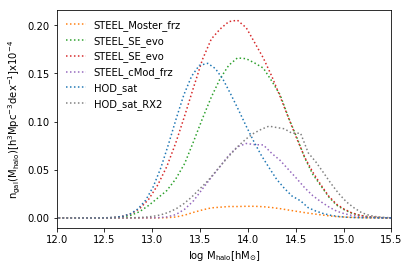

In [87]:
#Load Tinker_HOD
Tkr_hod = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_hod.dat", skiprows=2).T
Tkr_RX2 = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_RX2.dat", skiprows=2).T


#Load STEEL
Fit = ('1.0', False, False, True, 'G19_DPL', 'Moster')
AvaHaloMass, z, AnalyticalModelFrac_highz, AnalyticalModelNoFrac_highz, SM_Cuts = F.LoadData_Sat_Env_Highz(Fit)
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)

#Plot STEEL sat
Data_M_ix = np.digitize(11.45, bins = SM_Cuts)-1
Data_z_ix = np.digitize(0.5, bins = z)-1
print(SM_Cuts[Data_M_ix],z[Data_z_ix])
Y_Model = np.divide(AnalyticalModelNoFrac_highz[Data_M_ix][Data_z_ix], AvaHaloMassBins[Data_z_ix])
X_sat, Y_sat = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Y_Model, Scatt = 0.1)
Y_sat = Y_sat*(10**4)*(h**-3)

plt.plot(X_sat, Y_sat, ":",label = "STEEL_Moster_frz", color = "C1")

#Load STEEL
Fit = ('1.0', True, True, True, 'G19_DPL', 'G19_SE')#('1.0', False, False, True, 'G19_DPL', 'G19_SE')
AvaHaloMass, z, AnalyticalModelFrac_highz, AnalyticalModelNoFrac_highz, SM_Cuts = F.LoadData_Sat_Env_Highz(Fit)
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)

#Plot STEEL sat
Data_M_ix = np.digitize(11.45, bins = SM_Cuts)-1
Data_z_ix = np.digitize(0.5, bins = z)-1
print(SM_Cuts[Data_M_ix],z[Data_z_ix])
Y_Model = np.divide(AnalyticalModelNoFrac_highz[Data_M_ix][Data_z_ix], AvaHaloMassBins[Data_z_ix])
X_sat, Y_sat = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Y_Model, Scatt = 0.1)
Y_sat = Y_sat*(10**4)*(h**-3)

plt.plot(X_sat, Y_sat, ":",label = "STEEL_SE_evo", color = "C2")

#Load STEEL
Fit = ('1.0', False, False, True, 'G19_DPL', 'G19_SE')#('1.0', False, False, True, 'G19_DPL', 'G19_SE')
AvaHaloMass, z, AnalyticalModelFrac_highz, AnalyticalModelNoFrac_highz, SM_Cuts = F.LoadData_Sat_Env_Highz(Fit)
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)

#Plot STEEL sat
Data_M_ix = np.digitize(11.45, bins = SM_Cuts)-1
Data_z_ix = np.digitize(0.5, bins = z)-1
print(SM_Cuts[Data_M_ix],z[Data_z_ix])
Y_Model = np.divide(AnalyticalModelNoFrac_highz[Data_M_ix][Data_z_ix], AvaHaloMassBins[Data_z_ix])
X_sat, Y_sat = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Y_Model, Scatt = 0.1)
Y_sat = Y_sat*(10**4)*(h**-3)

plt.plot(X_sat, Y_sat, ":",label = "STEEL_SE_evo", color = "C3")

#Load STEEL
Fit = ('1.0', False, False, True, 'G19_DPL', 'G19_cMod')#('1.0', False, False, True, 'G19_DPL', 'G19_SE')
AvaHaloMass, z, AnalyticalModelFrac_highz, AnalyticalModelNoFrac_highz, SM_Cuts = F.LoadData_Sat_Env_Highz(Fit)
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)

#Plot STEEL sat
Data_M_ix = np.digitize(11.45, bins = SM_Cuts)-1
Data_z_ix = np.digitize(0.5, bins = z)-1
print(SM_Cuts[Data_M_ix],z[Data_z_ix])
Y_Model = np.divide(AnalyticalModelNoFrac_highz[Data_M_ix][Data_z_ix], AvaHaloMassBins[Data_z_ix])
X_sat, Y_sat = F.Gauss_Scatt(AvaHaloMass[Data_z_ix], Y_Model, Scatt = 0.1)
Y_sat = Y_sat*(10**4)*(h**-3)

#X_sat==X_cen
#plt.plot(X_sat, Y_cen+Y_sat, "-",label ="STEEL", color = "C0")
#plt.plot(X_cen, Y_cen, "--",label ="STEEL_cen", color = "C0")
plt.plot(X_sat, Y_sat, ":",label = "STEEL_cMod_frz", color = "C4")

#"""
#plt.plot(Tkr_hod[0], Tkr_hod[1]+(Tkr_hod[2]/10), "-",label = "HOD", color = "C1")
#plt.plot(Tkr_hod[0], Tkr_hod[1], "--",label = "HOD_cen", color = "C1")
plt.plot(Tkr_hod[0], Tkr_hod[2]/10, ":",label = "HOD_sat", color = "C0")
"""
"""
#plt.plot(Tkr_RX2[0], Tkr_RX2[1]+(Tkr_RX2[2]/10), "-",label = "HOD", color = "C2")
#plt.plot(Tkr_RX2[0], Tkr_RX2[1], "--",label = "HOD_cen", color = "C2")
plt.plot(Tkr_RX2[0], (Tkr_RX2[2]/10), ":",label = "HOD_sat_RX2", color = "C7")
#"""

plt.xlim(12, 15.5)
plt.xlabel("log $\mathrm{M_{halo} [hM_{\odot}]}$")
plt.ylabel("$\mathrm{n_{gal}(M_{halo}) [h^3Mpc^{-3}dex^{-1}]x10^{-4}}$")
plt.legend(frameon = False)
plt.show()



In [112]:
def ReturnCentralDist(HM_range, theta):
    Gamma, Gamma_z, Scatter = theta
    #Central only toy model
    #Args:
    #    HM_range: [Msun h-1]
    #    Gamma: SMHM high mass slope parameter
    #    Gamma_z: SMHM high mass slope evolution parameter
    #    Scatter: SMHM scatter parameter
    #Returns:
    #    Y_cen: Numberdensity of central galaxies above 10^11 as a fucntion of halo mass [h^3Mpc^{-3}dex^{-1}]x10^{-4}
    """
    Override['M10'] = 12.0
    Override['SHMnorm10'] = 0.032
    Override['beta10'] = 1.5
    Override['gamma10'] = Gamma#0.525
    Override['M11'] = 0.6
    Override['SHMnorm11'] = -0.014
    Override['beta11'] = -0.7
    Override['gamma11'] = Gamma_z#0.08
    """
    Override_lcl =\
    {\
    'M10':12.0,\
    'SHMnorm10':0.032,\
    'beta10':1.5,\
    'gamma10':Gamma,\
    'M11':0.6,\
    'SHMnorm11':-0.014,\
    'beta11':-0.7,\
    'gamma11':Gamma_z\
    }
    
    
    AbnMtch_lcl =\
    {\
    'Behroozi13': False,\
    'Behroozi18': False,\
    'B18c':False,\
    'B18t':False,\
    'G18':False,\
    'G18_notSE':False,\
    'G19_SE':False,\
    'G19_cMod':False,\
    'Lorenzo18':False,\
    'Moster': False,\
    'Moster10': False,\
    'Illustris': False,\
    'z_Evo':True,\
    'Scatter': 0.15,\
    'Override_0': False,\
    'Override_z': False,\
    'Override': Override_lcl,\
    'PFT': False,\
    'M_PFT1': False,\
    'M_PFT2': False,\
    'M_PFT3': False,\
    'N_PFT1': False,\
    'N_PFT2': False,\
    'N_PFT3': False,\
    'b_PFT1': False,\
    'b_PFT2': False,\
    'b_PFT3': False,\
    'g_PFT1': False,\
    'g_PFT2': False,\
    'g_PFT3': False,\
    'g_PFT4': False\
    }

    Paramaters_lcl = \
    {\
    'AbnMtch' : AbnMtch_lcl,\
    'AltDynamicalTime': 1,\
    'NormRnd': 0.5,\
    'SFR_Model': 'CE',\
    'PreProcessing': False,\
    'AltDynamicalTimeB': False\
    }
    
    AbnMtch_lcl['Override_z'] = True
    Central_Wt = HMF_fun(HM_range, 0.5)
    SM = F.DarkMatterToStellarMass(HM_range - np.log10(h), 0.5, Paramaters_lcl, ScatterOn = False)
    Norm = scipy.stats.norm(SM, Scatter)
    Prob = 1-Norm.cdf(11.45)
    Central_Wt = Central_Wt*Prob
    X_cen, Y_cen = F.Gauss_Scatt(HM_range, Central_Wt, Scatt = 0.1)
    Y_cen = Y_cen*(10**4)
    AbnMtch_lcl['Override_z'] = False
    return Y_cen

[ 0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.77635684e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.77635684e-15 -1.77635684e-15  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.77635684e-15 -1.77635684e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.77635684e-15 -1.77635684e-15
  0.00000000e+00  0.00000000e+00 -1.77635684e-15  0.00000000e+00
 -1.77635684e-15  0.00000000e+00 -1.77635684e-15 -1.77635684e-15
  0.00000000e+00 -1.77635684e-15  0.00000000e+00 -1.77635684e-15
  0.00000000e+00 -1.77635684e-15  0.00000000e+00 -1.77635684e-15
  0.00000000e+00 -1.77635684e-15  0.00000000e+00 -1.77635684e-15
 -1.77635684e-15  0.00000000e+00 -1.77635684e-15  0.00000000e+00
 -1.77635684e-15  0.00000000e+00  0.00000000e+00 -1.77635684e-15
  0.00000000e+00 -1.77635684e-15  0.00000000e+00 -1.77635684e-15
 -1.77635684e-15  0.00000000e+00 -1.77635684e-15  0.00000000e+00
 -1.77635684e-15  0.00000

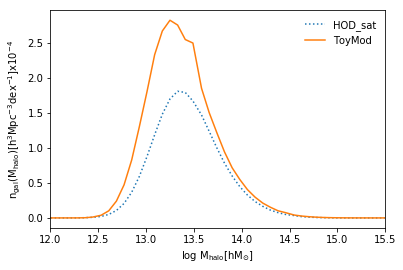

In [111]:
#Load Tinker_HOD
Tkr_hod = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_hod.dat", skiprows=2).T
Tkr_RX2 = np.loadtxt(AbsPath+"/Data/Observational/Tinker_HOD/pdf_censat_RX2.dat", skiprows=2).T
plt.plot(Tkr_hod[0], Tkr_hod[1], ":",label = "HOD_sat", color = "C0")
theta = 0.55, 0.0, 0.1
Y = ReturnCentralDist(Tkr_hod[0], theta)



plt.plot(Tkr_hod[0], Y, label = "ToyMod", color = "C1")
plt.legend(frameon = False)
plt.xlim(12, 15.5)
plt.xlabel("log $\mathrm{M_{halo} [hM_{\odot}]}$")
plt.ylabel("$\mathrm{n_{gal}(M_{halo}) [h^3Mpc^{-3}dex^{-1}]x10^{-4}}$")
plt.show()

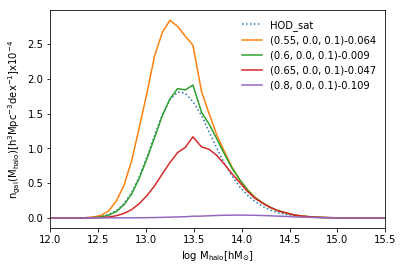

In [246]:
gt12 = np.digitize(12, bins = Tkr_hod[0])-1
theta = 0.55, 0.0, 0.1
plt.plot(Tkr_hod[0][gt12:], Tkr_hod[1][gt12:], ":",label = "HOD_sat", color = "C0")


theta = 0.55, 0.0, 0.1
RMS = lnlike(theta, Tkr_hod[0][gt12:], Tkr_hod[1][gt12:])
Y = ReturnCentralDist(Tkr_hod[0][gt12:], theta)
plt.plot(Tkr_hod[0][gt12:], Y, label = str(theta)+str(round(RMS, 3)), color = "C1")


theta = 0.6, 0.0, 0.1
RMS = lnlike(theta, Tkr_hod[0][gt12:], Tkr_hod[1][gt12:])
Y = ReturnCentralDist(Tkr_hod[0][gt12:], theta)
plt.plot(Tkr_hod[0][gt12:], Y, label = str(theta)+str(round(RMS, 3)), color = "C2")


theta = 0.65, 0.0, 0.1
RMS = lnlike(theta, Tkr_hod[0][gt12:], Tkr_hod[1][gt12:])
Y = ReturnCentralDist(Tkr_hod[0][gt12:], theta)
plt.plot(Tkr_hod[0][gt12:], Y, label = str(theta)+str(round(RMS, 3)), color = "C3")


theta = 0.8, 0.0, 0.1
RMS = lnlike(theta, Tkr_hod[0][gt12:], Tkr_hod[1][gt12:])
Y = ReturnCentralDist(Tkr_hod[0][gt12:], theta)
plt.plot(Tkr_hod[0][gt12:], Y, label = str(theta)+str(round(RMS, 3)), color = "C4")

plt.legend(frameon = False)
plt.xlim(12, 15.5)
plt.xlabel("log $\mathrm{M_{halo} [hM_{\odot}]}$")
plt.ylabel("$\mathrm{n_{gal}(M_{halo}) [h^3Mpc^{-3}dex^{-1}]x10^{-4}}$")
plt.show()

In [203]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [0.6, 0.0, 0.1], args=(Tkr_hod[0], Tkr_hod[1]))
result["x"]

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in power
/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in power
/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in power


array([-596.51158429, -597.12712836, -597.01751446])

In [253]:
theta = 10, 10, 0.1
lnlike(theta, Tkr_hod[0][gt12:], Tkr_hod[1][gt12:])

-170.2575309595363

In [261]:
#MCMC Functions

#This is the likelyhood function
def lnlike(theta, HM, y):
    g, g_z, s = theta
    model = ReturnCentralDist(HM, theta)
    
    return -0.5*np.power(sum(y-model), 2)
    
    #RMS = 1 - np.divide(np.sqrt(np.sum(np.power(model-y, 2))), len(y))
    #return np.log(RMS)

#This is the log-prior function
def lnprior(theta):
    g, g_z, s = theta
    if (0.55<g<0.57) and (-0.2<g_z<0.2) and (0.01<s<0.2):
        return 0.0
    else:
        return -np.inf
def lnprob(theta, x, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y)

In [262]:
#set up initial conditions
ndim, nwalkers = 3, 100
pos = [[0.55,0.0, 0.1] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [263]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(Tkr_hod[0][gt12:], Tkr_hod[1][gt12:]), threads = 20)

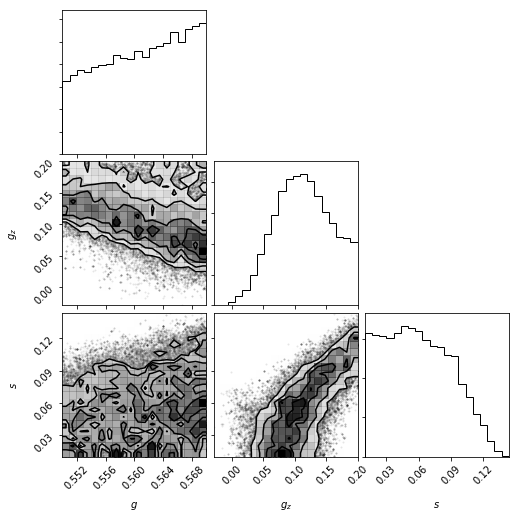

In [264]:
sampler.run_mcmc(pos, 500)
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$g$", "$g_z$", "$s$"])
fig.show()
#fig.savefig("triangle.png")

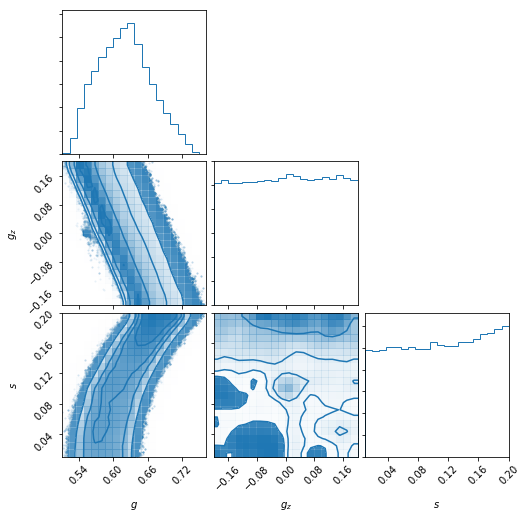

In [260]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
fig = corner.corner(samples, labels=["$g$", "$g_z$", "$s$"], color = "C0", smooth = True)
fig.show()

In [266]:
import pickle

(11.851503174495612, 0.4240451777324843, 0.3561125171293753) (0.024475291882669316, 0.017522753123739722, 0.010838221133269894) (2.131005912002379, 1.1690057727740952, 1.035576216046878) (0.5730685969661393, 0.1534045449068323, 0.09929425058243369)


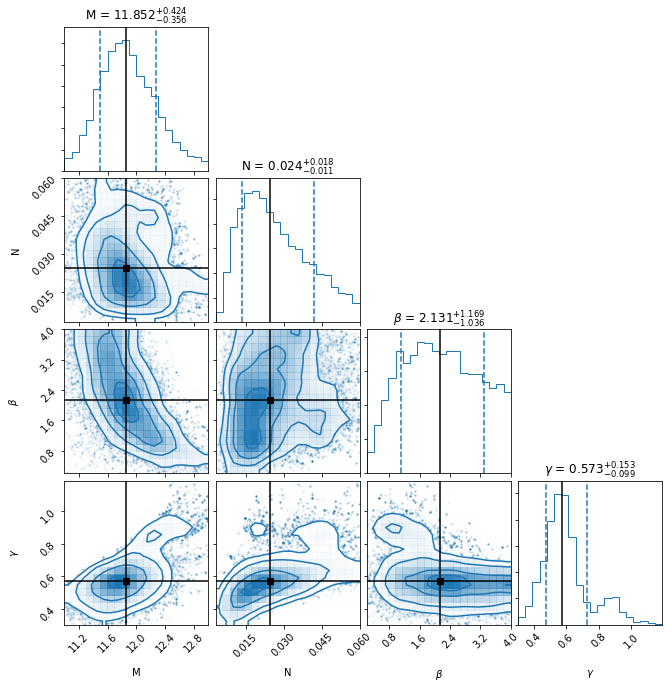

In [297]:
samples =  pickle.load(open(AbsPath+"/Data/Model/Output/Other/SMHM_Fitting/MCMC_Chain_lz.pkl", 'rb'))

M, N, b, g = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),zip(*np.percentile(samples, [16, 50, 84],axis=0)))
print(M, N, b, g)
fig = corner.corner(samples, labels=["M", "N", r"$\beta$", r"$\gamma$"], truths = [M[0], N[0], b[0], g[0]],\
                    color = "C0", truth_color = "k", smooth = True, quantiles=[0.16, 0.84],\
                    show_titles = True, title_fmt= ".3f")
fig.savefig(AbsPath+"/Figures/SMHM_Fit/MCMC_plot_lz.png")
fig.savefig(AbsPath+"/Figures/SMHM_Fit/MCMC_plot_lz.pdf")
fig.show()

(0.5907268507140121, 0.22114901159641442, 0.205990589128196) (-0.02373594737966747, 0.0034675872357696827, 0.0034426079440356486) (-0.7949440744376817, 0.44454057425148796, 0.36471202902090116) (0.09210993946517806, 0.14180879546953906, 0.18612969760297338)


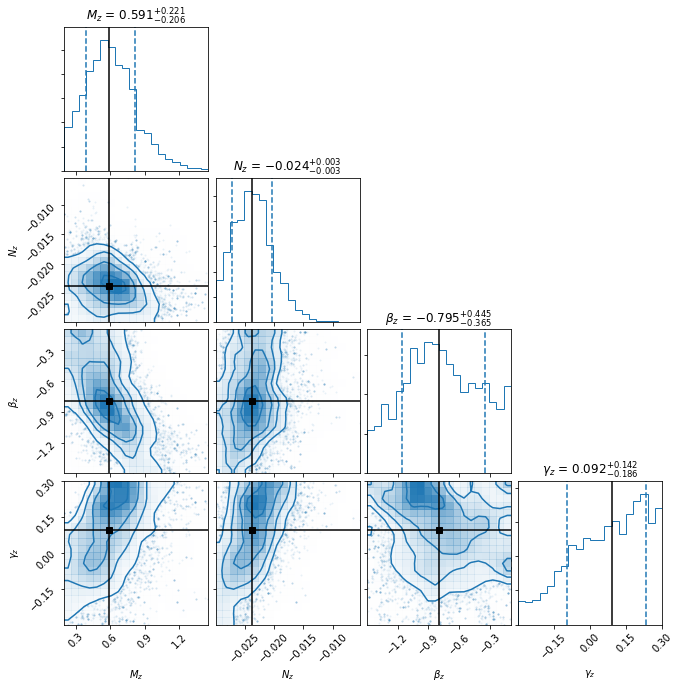

In [298]:
samples =  pickle.load(open(AbsPath+"/Data/Model/Output/Other/SMHM_Fitting/MCMC_Chain_hz.pkl", 'rb'))

M, N, b, g = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),zip(*np.percentile(samples, [16, 50, 84],axis=0)))
print(M, N, b, g)
fig = corner.corner(samples, labels=[r"$M_z$", r"$N_z$", r"$\beta_z$", r"$\gamma_z$"], truths = [M[0], N[0], b[0], g[0]],\
                    color = "C0", truth_color = "k", smooth = True, quantiles=[0.16, 0.84],\
                   show_titles = True, title_fmt= ".3f")
fig.savefig(AbsPath+"/Figures/SMHM_Fit/MCMC_plot_hz.png")
fig.savefig(AbsPath+"/Figures/SMHM_Fit/MCMC_plot_hz.pdf")
fig.show()

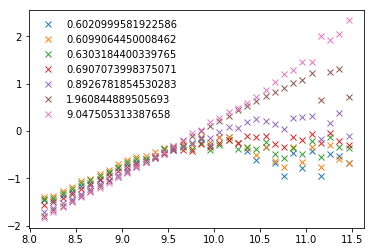

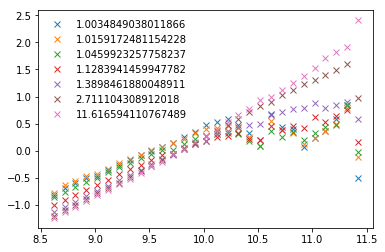

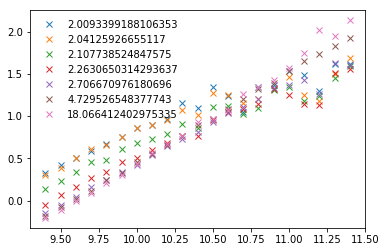

In [531]:
Cosmo.lookbackTime(Cosmo.lookbackTime(2.0)+np.mean(10**Data['2.0']['agebins']/10**9, axis = 1), inverse = True)

array([ 2.00933992,  2.04125927,  2.10773852,  2.26306503,  2.70667098,
        4.72952655, 18.0664124 ])

In [533]:
Cosmo.lookbackTime(Cosmo.lookbackTime(1.0)+np.mean(10**Data['1.0']['agebins']/10**9, axis = 1), inverse = True)

array([ 1.0034849 ,  1.01591725,  1.04599233,  1.12839415,  1.38984619,
        2.71110431, 11.61659411])

In [530]:
Cosmo.lookbackTime(Cosmo.lookbackTime(0.6)+np.mean(10**Data['0.6']['agebins']/10**9, axis = 1), inverse = True)

array([0.60209996, 0.60990645, 0.63031844, 0.6907074 , 0.89267819,
       1.96084489, 9.04750531])

In [569]:
import h5py

In [570]:
Emerge = h5py.File(AbsPath+"/Data/Observational/Moster_EMERGE/mainbranches.S85.h5")

In [572]:
list(Emerge.keys())

['MainBranch_M000']

In [573]:
data = Emerge['MainBranch_M000']

In [616]:
Trees = list(data.keys())

In [666]:
Output = [],[],[] #z,M,ratio

Switch = True
for i, tree_id in enumerate(Trees):
    Tree = Emerge['MainBranch_M000'][tree_id]
    SF = Tree['Scale_factor']
    SM = Tree['Stellar_mass']
    SFR = Tree['SFR']
    CenSat = Tree['Type']
    H_ID = Tree['Halo_ID']
    D_ID = Tree['Desc_ID']
    if 11.9< SM[0] < 12.1:
        print(np.shape(CenSat))
        SM_growth = np.power(10, SM[0:-2]) - np.power(10, SM[1:-1])
        t = Cosmo.lookbackTime((1/SF)-1)
        z = Cosmo.lookbackTime((t[1:-1] + t[0:-2])/2)
        delta_t = t[1:-1] - t[0:-2]
        SM_dt = SM_growth/delta_t
        
        if Switch:
            z_stack = z
            M_stack = np.power(10, SM[0:-2]) + np.power(10, SM[1:-1])/2
            r_stack = SM_dt/np.divide(SFR[0:-2]+SFR[1:-1],2)
            Switch = False
        else:
            print(np.shape(z_stack))
            print(np.shape(z))
            z_stack = np.vstack((z_stack, z))
            M_stack = np.vstack((M_stack, np.power(10, SM[0:-2]) + np.power(10, SM[1:-1])/2))
            r_stack = np.vstack((r_stack, SM_dt/np.divide(SFR[0:-2]+SFR[1:-1],2)))

(92,)
(91,)
(90,)
(89,)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [661]:
np.hstack?

Signature: np.hstack(tup)
Docstring:
Stack arrays in sequence horizontally (column wise).

This is equivalent to concatenation along the second axis, except for 1-D
arrays where it concatenates along the first axis. Rebuilds arrays divided
by `hsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the second axis,
    except 1-D arrays which can be any length.

Returns
-------
stacked : ndarray
    The array formed by stacking the given arrays.

See Also
--------
stack : Join a sequence of arrays along a new axis.
vstack : Stack arrays in sequence vertically (row wise).
dstack : Stack arrays in sequence depth wise (along third axis).
concatenate 

In [632]:
np.shape(np.array(Output[1]))

(34,)

In [611]:
Tree.dtype

dtype([('Scale_factor', '<f4'), ('Halo_mass', '<f4'), ('Halo_growth_rate', '<f4'), ('Halo_mass_peak', '<f4'), ('Scale_peak_mass', '<f4'), ('Halo_radius', '<f4'), ('Concentration', '<f4'), ('Halo_spin', '<f4'), ('Stellar_mass', '<f4'), ('SFR', '<f4'), ('Intra_cluster_mass', '<f4'), ('X_pos', '<f4'), ('Y_pos', '<f4'), ('Z_pos', '<f4'), ('X_vel', '<f4'), ('Y_vel', '<f4'), ('Z_vel', '<f4'), ('Type', '<u2'), ('Halo_ID', '<i8'), ('Desc_ID', '<i8'), ('Up_ID', '<i8')])

In [624]:
CenSat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint16)

In [613]:
SF

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09], dtype=float32)

In [609]:
SM

array([12.175739 , 12.176261 , 12.176792 , 12.177333 , 12.177884 ,
       12.061896 , 12.062454 , 12.063023 , 12.0636015, 12.029242 ,
       12.029843 , 12.0304575, 12.031084 , 12.031724 , 12.032377 ,
       12.033008 , 12.033688 , 12.034382 , 12.035089 , 12.03581  ,
       12.03655  , 12.037303 , 12.038068 , 12.038837 , 12.0396185,
       12.038952 , 12.039765 , 12.040592 , 12.041438 , 12.042312 ,
       12.043218 , 12.0441675, 12.045185 , 12.046184 , 12.047215 ,
       12.048282 , 12.049385 , 12.05053  , 12.051721 , 12.052961 ,
       12.054263 , 12.055624 , 11.938603 , 11.939976 , 11.941434 ,
       11.942997 , 11.944696 , 11.946884 , 11.877717 , 11.880192 ,
       11.772028 , 11.773552 , 11.775101 , 11.776418 , 11.777585 ,
       11.778686 , 11.779721 , 11.745745 , 11.61735  , 11.6177225,
       11.618099 , 11.436379 , 11.433108 , 11.426938 , 11.419335 ,
       11.411372 , 11.403782 , 11.400237 , 11.398963 , 11.39683  ,
       11.392901 , 11.386749 , 11.380763 , 11.370331 , 11.3703